Erst müssen einige Biblotheken heruntergeladen werden um die benötigte Funktionen zu implementieren


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In Zweite Schritt werden die orginale Daten in das Programm importiert. Dies sind Orginale Daten und enthalten keine Manipulation oder Cleaning.

In [2]:
# Data for the CO2 mesurment.
co2 = pd.read_csv('co2-mm-mlo_csv.csv', delimiter=',')
# File tor the Average Temp mesurment
file = pd.read_csv('GlobalLandTemperaturesByCountry.csv', delimiter=',')

Beide Dataeinen wurden vom Kaggle heruntergeladen. Da die Datein als CSV gespeichert sind, enthalten die eine komma seperatur. Dies wird mit dem Befehl delimiter=',' sortiert. Pandas enthält die Funktion read_csv welches zunächst die Daten auf co2 bzw. auf file geschrieben hat

In [3]:
co2_filter = co2[['Decimal Date','Trend']]


dic = {
    "Datum":[], "Trend":[], "Average":[]
}


In [4]:
co2.describe()

,Decimal Date,Average,Interpolated,Trend,Number of Days
count,727.000000,727.000000,727.000000,727.000000,727.000000
mean,1988.458333,349.555846,353.640702,353.633054,18.341128
std,17.500926,52.068588,27.443136,27.369003,12.242015
min,1958.208000,-99.990000,312.660000,314.620000,-1.000000
25%,1973.333500,328.425000,328.555000,329.295000,-1.000000
50%,1988.458000,351.310000,351.310000,351.370000,24.000000
75%,2003.583500,375.700000,375.700000,376.135000,28.000000
max,2018.708000,411.240000,411.240000,409.020000,31.000000


Definiere ein Dictionary welches alle produzierte Daten speichert!

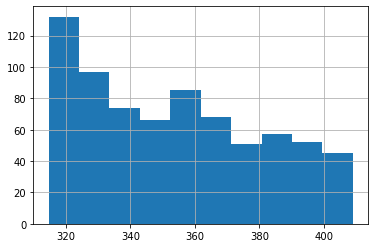

In [5]:
viz = co2['Trend']
viz.hist()
plt.show()

Wehlen die interessante aus beiden Dateien, die wir dann zusammen mergen und daraus z.B eine Excel Datei ausstellen.

In [6]:

for i in range(1960,2014):
    co2_filter = co2[['Decimal Date', 'Trend']]
    mask = (co2_filter['Decimal Date'].astype(int) == i)
    temp = co2_filter.loc[mask]

    vc = file[['dt', 'AverageTemperature', 'Country']]
    mask1 = (vc['dt'].str.contains(str(i))) & (vc['Country'].str.contains('Germany'))
    vc = vc.loc[mask1]
    # Add data from Bothe Files to the Dictionary
    dic["Datum"].append(i)
    dic["Trend"].append(temp['Trend'].mean())
    dic["Average"].append(vc['AverageTemperature'].max())


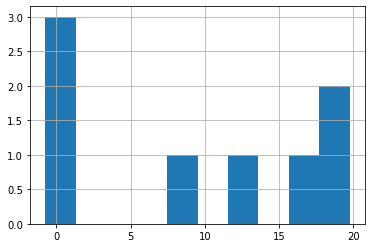

In [7]:
viz_2 = vc['AverageTemperature']
viz_2.hist()
plt.show()

In [8]:
vc.describe()

,AverageTemperature
count,8.000000
mean,9.235250
std,8.536675
min,-0.731000
25%,0.278750
50%,10.182000
75%,16.503500
max,19.762000


In [9]:
X = dic["Datum"]
Y = dic["Trend"]
Z = dic["Average"]

In [10]:
print("Length of X: ",len(X))
print("Length of Y: ",len(Y))
print("Length of Z: ",len(Z))

Length of X:  54
Length of Y:  54
Length of Z:  54


In [11]:
X_train,Y_train,X_test,Y_test = train_test_split(X,Y,train_size=0.2,random_state=0)
lin_reg = LinearRegression()

In [12]:
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)
lin_reg.fit(X,Y)


LinearRegression()

Das Co2 verhält sich bei seiner erhöung wie eine quadratische Funktion.

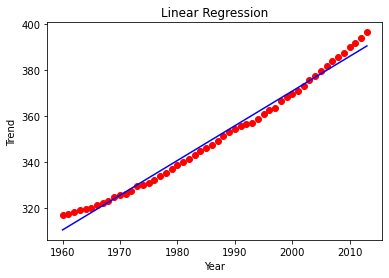

In [13]:
plt.scatter(X,Y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Trend')
plt.show()


In [14]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly,Y)

LinearRegression()

Passing the Linear regression to the Polynomail

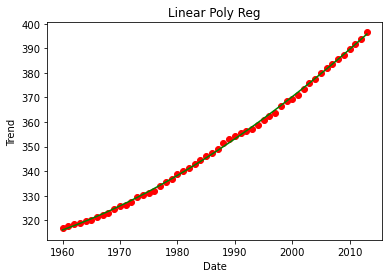

In [15]:
plt.scatter(X,Y,color='red')
plt.plot(X,pol_reg.predict(poly_reg.fit_transform(X)),color='green')
plt.title('Linear Poly Reg')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.show()

Daten in Dictionary schreiben. Index ist hier einzuhalten.

In [16]:
for s in range(2014,2050):

    dic["Trend"].append(float(str(pol_reg.predict(poly_reg.fit_transform([[s]])))[1:-1][1:-1]))



In [17]:
X_train,Z_train,X_test,Z_test = train_test_split(X,Z,train_size=0.2,random_state=0)
lin_reg_z = LinearRegression()
Z = np.array(Z).reshape(-1,1)
lin_reg_z.fit(X,Z)

LinearRegression()

In [18]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly,Z)

LinearRegression()

Die deutsche durchschnittliche Max Temperatur zeigt fast eine Lineare verhalten.

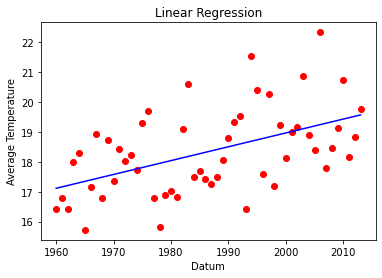

In [19]:
plt.scatter(X,Z,color='red')
plt.plot(X,lin_reg_z.predict(X),color='blue')
plt.title('Linear Regression')
plt.xlabel("Datum")
plt.ylabel("Average Temperature")
plt.show()


In [20]:
for f in range(2014,2050):
    dic["Datum"].append(f)
    dic["Average"].append(float(str(pol_reg.predict(poly_reg.fit_transform([[f]])))[1:-1][1:-1]))

Hier fehlt das Random Error! T_T

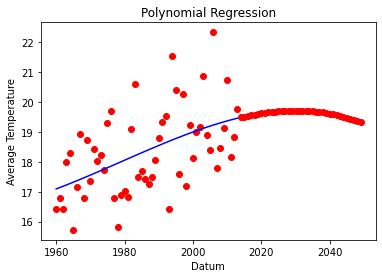

In [21]:
plt.scatter(dic["Datum"],dic["Average"],color='red')
plt.plot(X,pol_reg.predict(poly_reg.fit_transform(X)),color='blue')
plt.title('Polynomial Regression')
plt.xlabel("Datum")
plt.ylabel("Average Temperature")
plt.show()

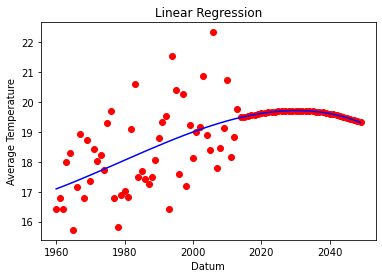

In [22]:
F1 = dic["Datum"]
F2 = dic["Average"]
F1 = np.array(F1).reshape(-1,1)
F2 = np.array(F2).reshape(-1,1)
lin_reg_z.fit(F1,F2)
plt.scatter(F1,F2,color='red')
plt.plot(F1,pol_reg.predict(poly_reg.fit_transform(F1)),color='blue')
plt.title('Linear Regression')
plt.xlabel("Datum")
plt.ylabel("Average Temperature")
plt.show()

In [23]:
def export_excel():
    print("Generating Excel File...")
    df = pd.DataFrame.from_dict(dic)
    df.to_excel("Testing_Data_Excel.xlsx", index=False, startcol=0, startrow=0, header=True)
    print("OK, File Saved")
    pass

def export_csv():
    print("Generating CSV File...")
    df = pd.DataFrame.from_dict(dic)
    df.to_csv("Testing_Data_csv.csv", index=False,header=True)
    print("OK, File Saved")
    pass


export_csv()
export_excel()

Generating CSV File...
OK, File Saved
Generating Excel File...
OK, File Saved


References that been used for the Project

1. GlobaleLandTempertureByCountry.csv :_ 
   https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
   
2. CO2 Messungen:_ https://datahub.io/core/co2-ppm

3. Code for Polynomial Regression :_ https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

4. Weitere Methoden/Techniken unter Cognative Class. Corse Name, Machine Learning with Python.

5. Intro to Polynomial/ Linear Regression:_ https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb

6. Pandas Tutorial for Machine Learning:_ https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

7. Matplotlibe tutorial:_ https://www.g-webservice.de/python-machine-learning-tutorial/ 


   